stability limit: 0.00034375
CPU time: 0.0s
0.0
0.00034375
0.0006875
0.00103125
0.001375
0.0017187499999999998
0.0020625
0.00240625
0.00275
0.0030937499999999997
0.0034374999999999996
0.00378125
0.004125
0.00446875
0.0048125
0.005156249999999999
0.0055
0.00584375
0.006187499999999999
0.00653125
0.006874999999999999
0.0072187499999999995
0.0075625
0.00790625
0.00825
0.008593749999999999
0.0089375
0.00928125
0.009625
0.00996875
0.010312499999999999
0.010656249999999999
0.011
0.01134375
0.0116875
0.012031249999999999
0.012374999999999999
0.01271875
0.0130625
0.01340625
0.013749999999999998
0.014093749999999999
0.014437499999999999
0.01478125
0.015125
0.01546875
0.0158125
0.01615625
0.0165
0.016843749999999998
0.017187499999999998
0.017531249999999998
0.017875
0.01821875
0.0185625
0.01890625
0.01925
0.01959375
0.0199375


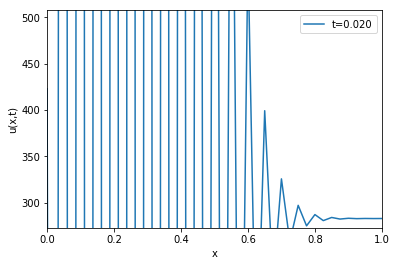

In [2]:
from numpy import linspace, zeros, linspace, asarray
import time

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 423

def dsdt(t):
    return 0

def g(x, t):
    return 0

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u,t))
    u = zeros((N_t+1, len(U_0)))
    t= linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

L = 1                # Rod Length
beta = 1       # K / rho * c K = heat conduction coefficient, rho = density, c = heat capacity
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
#dt = dx**2/(2*beta) # 0.0003125
dt = 0.00034375
print('stability limit:', dt)

t0 = time.process_time()
u, t = ode_FE(rhs, U_0, dt, T=0.02)
t1 = time.process_time()
print('CPU time: %.1fs' % (t1 - t0))

# Make movie
import os
os.system('rm tmp_*.png')
import matplotlib.pyplot as plt
plt.ion()
y = u[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], 273, 1.2*s(0)])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
for i in range(0, u.shape[0]):
    print(t[i])
    lines[0].set_ydata(u[i,:])
    plt.legend(['t=%.3f' % t[i]])
    plt.draw()
    if i % 10 == 0:
        plt.savefig('tmp_%04d.png' % counter)
        counter += 1